# **Tree and Random Forest**





Basic packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

# *Decision Tree Classifier*

Import sklearn library for classification trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Smarket_filepath = "/content/drive/MyDrive/Smarket.xlsx"
Smarket = pd.read_excel(Smarket_filepath)
Smarket = pd.DataFrame(Smarket)
Smarket.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
X = Smarket.drop(columns = ["Direction", "Year", "Today"])
y = Smarket["Direction"]


In [ ]:
print(X.shape)


(1250, 6)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(Y_train.shape)

(1000, 6)
(1000,)


*Decision Tree Classifier*

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2 , random_state=40)
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=40)

[Text(0.5, 0.8333333333333334, 'Lag2 <= 0.73\ngini = 0.499\nsamples = 1000\nvalue = [476, 524]\nclass = Up'),
 Text(0.25, 0.5, 'Volume <= 1.518\ngini = 0.495\nsamples = 802\nvalue = [361, 441]\nclass = Up'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 508\nvalue = [251, 257]\nclass = Up'),
 Text(0.375, 0.16666666666666666, 'gini = 0.468\nsamples = 294\nvalue = [110, 184]\nclass = Up'),
 Text(0.75, 0.5, 'Lag5 <= 1.886\ngini = 0.487\nsamples = 198\nvalue = [115, 83]\nclass = Up'),
 Text(0.625, 0.16666666666666666, 'gini = 0.474\nsamples = 184\nvalue = [113, 71]\nclass = Up'),
 Text(0.875, 0.16666666666666666, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]\nclass = Up')]

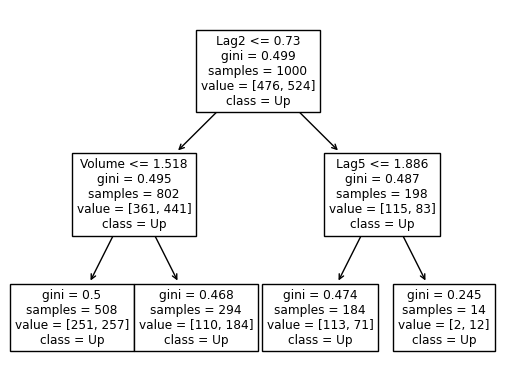

In [ ]:
plot_tree(tree_clf, feature_names=X.columns.values, class_names=y.values)

In [ ]:
tree_prediction = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_test, tree_prediction),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,30,96
ActualUp,27,97


In [ ]:
tree_clf2 = DecisionTreeClassifier(criterion= 'entropy', max_depth=2 , random_state=40)
tree_clf2.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

[Text(0.5, 0.8333333333333334, 'Lag1 <= 0.056\nentropy = 0.999\nsamples = 1250\nvalue = [602, 648]\nclass = Up'),
 Text(0.25, 0.5, 'Lag5 <= -0.822\nentropy = 0.988\nsamples = 640\nvalue = [278, 362]\nclass = Up'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.991\nsamples = 128\nvalue = [71, 57]\nclass = Up'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 512\nvalue = [207, 305]\nclass = Up'),
 Text(0.75, 0.5, 'Lag1 <= 0.137\nentropy = 0.997\nsamples = 610\nvalue = [324, 286]\nclass = Up'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.855\nsamples = 50\nvalue = [36, 14]\nclass = Up'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.999\nsamples = 560\nvalue = [288, 272]\nclass = Up')]

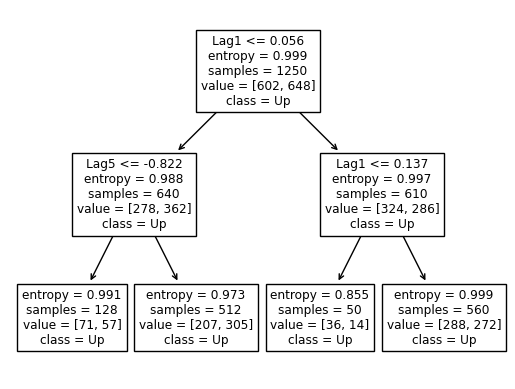

In [ ]:
plot_tree(tree_clf2, feature_names=X.columns.values, class_names=y.values)

In [ ]:
tree_prediction2 = tree_clf2.predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(Y_test, tree_prediction2),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,88,38
ActualUp,65,59


In [ ]:
tree_clf3 = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=40)
tree_clf3.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=40)

[Text(0.4659090909090909, 0.9, 'Lag1 <= 0.056\nentropy = 0.999\nsamples = 1250\nvalue = [602, 648]\nclass = Up'),
 Text(0.22727272727272727, 0.7, 'Lag5 <= -0.822\nentropy = 0.988\nsamples = 640\nvalue = [278, 362]\nclass = Up'),
 Text(0.13636363636363635, 0.5, 'Lag5 <= -0.852\nentropy = 0.991\nsamples = 128\nvalue = [71, 57]\nclass = Up'),
 Text(0.09090909090909091, 0.3, 'Lag4 <= 1.317\nentropy = 0.998\nsamples = 120\nvalue = [63, 57]\nclass = Up'),
 Text(0.045454545454545456, 0.1, 'entropy = 0.985\nsamples = 103\nvalue = [59, 44]\nclass = Up'),
 Text(0.13636363636363635, 0.1, 'entropy = 0.787\nsamples = 17\nvalue = [4, 13]\nclass = Up'),
 Text(0.18181818181818182, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Up'),
 Text(0.3181818181818182, 0.5, 'Lag5 <= -0.775\nentropy = 0.973\nsamples = 512\nvalue = [207, 305]\nclass = Up'),
 Text(0.2727272727272727, 0.3, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Up'),
 Text(0.36363636363636365, 0.3, 'Lag2 <= 0.727\nentropy = 

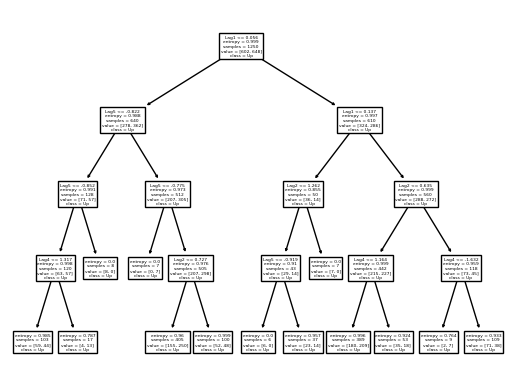

In [ ]:
plot_tree(tree_clf3, feature_names=X.columns.values, class_names=y.values)

In [ ]:
tree_prediction3 = tree_clf3.predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(Y_test, tree_prediction3),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,55,71
ActualUp,35,89


In [ ]:
tree_clf4 = DecisionTreeClassifier(max_depth=2, random_state=40, ccp_alpha=100)
tree_clf4.fit(X, y)


DecisionTreeClassifier(ccp_alpha=100, max_depth=2, random_state=40)

[Text(0.5, 0.5, 'gini = 0.499\nsamples = 1250\nvalue = [602, 648]\nclass = Up')]

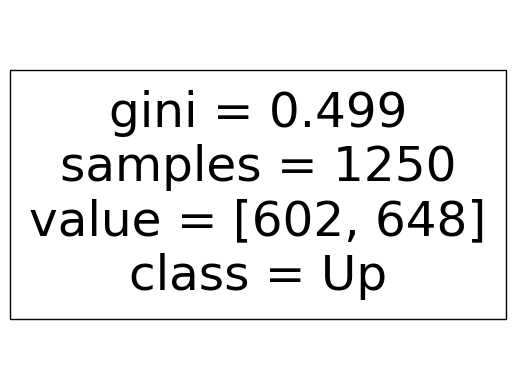

In [ ]:
plot_tree(tree_clf4, feature_names=X.columns.values, class_names=y.values)

In [ ]:
tree_prediction4 = tree_clf4.predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(Y_test, tree_prediction4),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,0,126
ActualUp,0,124


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, criterion= 'entropy', max_leaf_nodes=60, random_state=40)
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(Y_test, y_pred_rf),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,55,71
ActualUp,54,70


## **Decision Tree Regressor**

In [ ]:
#loading the dataset direclty from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Boston_filepath = "/content/drive/MyDrive/Boston.xlsx"
Boston = pd.read_excel(Boston_filepath)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
bos = pd.DataFrame(Boston)

In [ ]:
x_total=bos.drop(['medv'], axis=1)
y_price=bos['medv']
y_price = np.array(y_price).reshape(-1,1)

print(x_total.shape)
print(y_price.shape)


(506, 13)
(506, 1)


In [ ]:
X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split(x_total, y_price, test_size = 0.2, random_state=5)

print(X_train_t.shape)
print(X_test_t.shape)
print(Y_train_t.shape)
print(Y_test_t.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X_train_t, Y_train_t)


DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, '5 <= 6.971\nsquared_error = 85.902\nsamples = 404\nvalue = 22.647'),
 Text(0.25, 0.5, '12 <= 14.405\nsquared_error = 44.217\nsamples = 348\nvalue = 20.169'),
 Text(0.125, 0.16666666666666666, 'squared_error = 30.629\nsamples = 209\nvalue = 23.661'),
 Text(0.375, 0.16666666666666666, 'squared_error = 18.758\nsamples = 139\nvalue = 14.919'),
 Text(0.75, 0.5, '5 <= 7.437\nsquared_error = 69.759\nsamples = 56\nvalue = 38.043'),
 Text(0.625, 0.16666666666666666, 'squared_error = 28.828\nsamples = 33\nvalue = 32.961'),
 Text(0.875, 0.16666666666666666, 'squared_error = 38.254\nsamples = 23\nvalue = 45.335')]

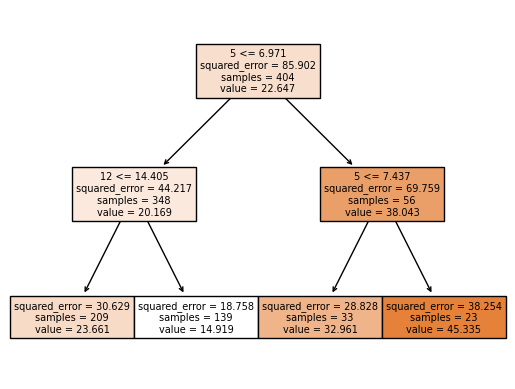

In [ ]:
plot_tree(tree_reg1, filled=True, feature_names=x_total.index)

In [ ]:
tree_prediction_reg1 = tree_reg1.predict(X_test_t)

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

mse_t_test = mean_squared_error(Y_test_t, tree_prediction_reg1)
rmse_t_test = (np.sqrt(mean_squared_error(Y_test_t, tree_prediction_reg1)))
r2_t_test = round(r2_score(Y_test_t, tree_prediction_reg1),2)

print("The model performance for training set")
print("--------------------------------------")
print('MSE_t_train is {}'.format(mse_t_test))
print('RMSE_t_train is {}'.format(rmse_t_test))
print('R2_t_train score is {}'.format(r2_t_test))
print("\n")

The model performance for training set
--------------------------------------
MSE_t_train is 22.198065271791638
RMSE_t_train is 4.711482279685623
R2_t_train score is 0.72


